In [ ]:
import pandas as pd 
from sklearn.ensemble import IsolationForest 
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt 

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df
import hvplot.pandas
import panel as pn
import numpy as np
import holoviews as hv
hv.extension('bokeh')
pn.extension('tabulator')
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0", ]

In [87]:
variable  = pnw.RadioButtonGroup(name='variable', value='mpg', 
                                 options=list(df.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

In [92]:
variable

RadioButtonGroup(name='variable', options=['mpg', 'cyl', ...], value='mpg')

In [93]:
%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable, window=30, sigma=10, view_fn=mpl_plot):
    
    avg = df[variable].rolling(window=window).mean()
    residual = df[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/thistleknot/Python-Stock/master/data/raw/states.csv") 

In [ ]:
variable = pn.widgets.Select(name='variable', options=list(df.columns))

In [ ]:
variable

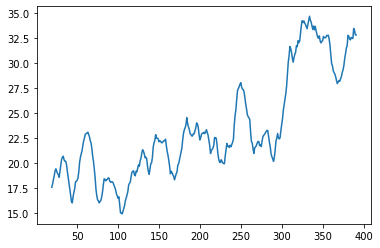

In [94]:
find_outliers(variable='mpg', window=20, sigma=10)

In [95]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

ValueError: cannot find widget or abbreviation for argument: 'variable'

In [ ]:
q_s = df[df.columns[1:]].quantile([.02,.09,.25,.5,.75,.91,.98])

In [ ]:
idf = df.interactive()

In [ ]:
[*list(df.columns[2:])]

In [ ]:
quantiles = pn.widgets.RadioButtonGroup(
    name='Quantiles', 
    options=[.02,.09,.25,.5,.75,.91,.98],
    button_type='success'
)

In [ ]:
quantiles

In [ ]:
df.columns

In [ ]:
quantiles

In [ ]:
xaxis = pn.widgets.Select(
    name='X axis', 
    options=['Infant Mort',
 'White',
 'Crime',
 'Doctors',
 'Traf Deaths',
 'University',
 'Unemployed',
 'Income',
 'Population'],
    #button_type='success'
)

In [ ]:
yaxis = pn.widgets.Select(
    name='Y axis', 
    options=['Infant Mort',
 'White',
 'Crime',
 'Doctors',
 'Traf Deaths',
 'University',
 'Unemployed',
 'Income',
 'Population'],
    #button_type='success'
)

In [ ]:
ipipeline = (
    idf[
        #(idf['Poverty'] >= idf['Poverty'].quantile(.5)) ##& 
        (idf[yaxis] >= idf[yaxis].quantile([.02,.09,.25,.5,.75,.91,.98]).loc[quantiles]) ##& 
        #(idf.mfr.isin(mfr))
    ]
    #.groupby(['origin', 'mpg'])[yaxis].mean()
    #.to_frame()
    #.reset_index()
    #.sort_values(by='mpg')  
    #.reset_index(drop=True)
)

In [ ]:
ihvplot = ipipeline.hvplot(y=yaxis, x=xaxis, by=yaxis, color=PALETTE)#, line_width=6)
#ihvplot.line(x='Poverty', y=yaxis)

In [ ]:
#import panel.widgets as pnw
#import xarray as xr
#ds = xr.tutorial.load_dataset('air_temperature')

In [ ]:
q = pnw.FloatSlider(name='quantile', start=0, end=1)

(ds.air.interactive(loc='left')
 .sel(time=pnw.DiscreteSlider)
 .quantile(q=q, dim='lon')
 .hvplot(aspect=1))

In [ ]:
itable = ipipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')

In [ ]:
itable

In [ ]:
ihvplot

In [ ]:

df.hvplot.scatter(y=yaxis, x=xaxis)

In [ ]:
import hvplot.pandas

In [ ]:
from bokeh.sampledata.iris import flowers as df_

type(df_)